In [2]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
from sklearn.datasets import load_wine
df = load_wine()
df = pd.DataFrame(df['data'], columns = df['feature_names'])

In [5]:
display(df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


array([[<AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'malic_acid'}>,
        <AxesSubplot:title={'center':'ash'}>,
        <AxesSubplot:title={'center':'alcalinity_of_ash'}>],
       [<AxesSubplot:title={'center':'magnesium'}>,
        <AxesSubplot:title={'center':'total_phenols'}>,
        <AxesSubplot:title={'center':'flavanoids'}>,
        <AxesSubplot:title={'center':'nonflavanoid_phenols'}>],
       [<AxesSubplot:title={'center':'proanthocyanins'}>,
        <AxesSubplot:title={'center':'color_intensity'}>,
        <AxesSubplot:title={'center':'hue'}>,
        <AxesSubplot:title={'center':'od280/od315_of_diluted_wines'}>],
       [<AxesSubplot:title={'center':'proline'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

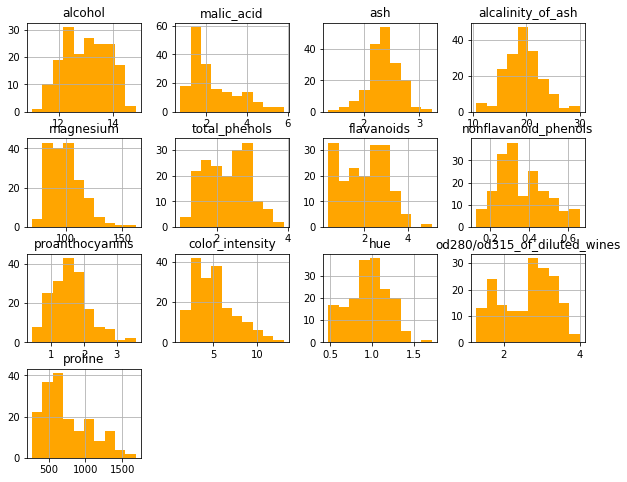

In [8]:
df.hist(color = 'orange', figsize = (10,8))

In [9]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [10]:
print(data_scaled[:5])

[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


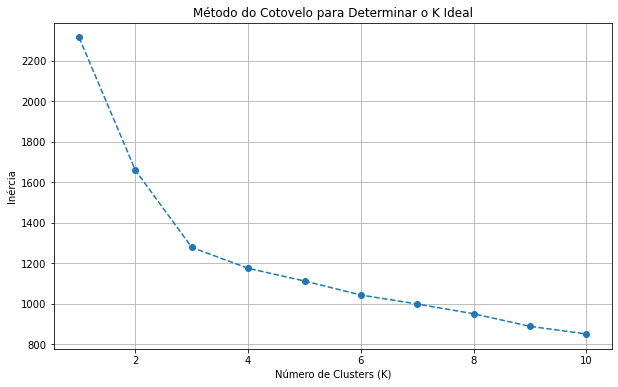

In [11]:
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# Visualizar a curva de cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o K Ideal')
plt.grid(True)
plt.show()

In [12]:
# Escolha o número de clusters (K)
k = 3

# Crie uma instância do modelo K-means
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=0)

# Treine o modelo com os dados padronizados
kmeans.fit(data_scaled)

# Obtenha as etiquetas dos clusters para cada cliente
labels = kmeans.labels_

# Calcular manualmente os centroides de cada cluster
import numpy as np

# Inicializar uma matriz para armazenar os centroides
centroids = np.zeros((k, data_scaled.shape[1]))

# Calcular os centroides manualmente
for cluster_label in range(k):
    cluster_data = data_scaled[labels == cluster_label]  # Selecionar dados pertencentes ao cluster
    cluster_centroid = np.mean(cluster_data, axis=0)  # Calcular a média das características do cluster
    centroids[cluster_label] = cluster_centroid

print("Coordenadas dos centroides:")
print(centroids)

Coordenadas dos centroides:
[[ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.93900326 -0.39196582 -0.43920097  0.20898793 -0.46377382 -0.05334831
   0.06690377 -0.01982215  0.06479192 -0.88207529  0.45298189  0.28973833
  -0.75602559]
 [ 0.87809728 -0.30457633  0.31894179 -0.66452366  0.56488825  0.87650546
   0.94363903 -0.58558981  0.58178294  0.16718842  0.48372814  0.76705349
   1.15834713]]


In [13]:
# Calcular as distâncias entre os centroides
distances = np.zeros((k, k))

for i in range(k):
    for j in range(k):
        distances[i, j] = distance.euclidean(centroids[i], centroids[j])

print("Distâncias entre os centroides:")
print(distances)

Distâncias entre os centroides:
[[0.         3.97440678 5.04193227]
 [3.97440678 0.         3.59453165]
 [5.04193227 3.59453165 0.        ]]


In [ ]:
plt.figure(figsize=(12, 8))

# Gráfico de dispersão com cores de cluster
plt.subplot(2, 1, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='Blues_r', label='vinhos')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroides', marker='X')
plt.xlabel('Compras Mensais (Padronizado)')
plt.ylabel('Número de Pedidos (Padronizado)')
plt.title('Segmentação de Clientes por Compras e Número de Pedidos com Centroides')
plt.legend()

# Matriz de distâncias
plt.subplot(2, 1, 2)
plt.imshow(distances, cmap='Blue

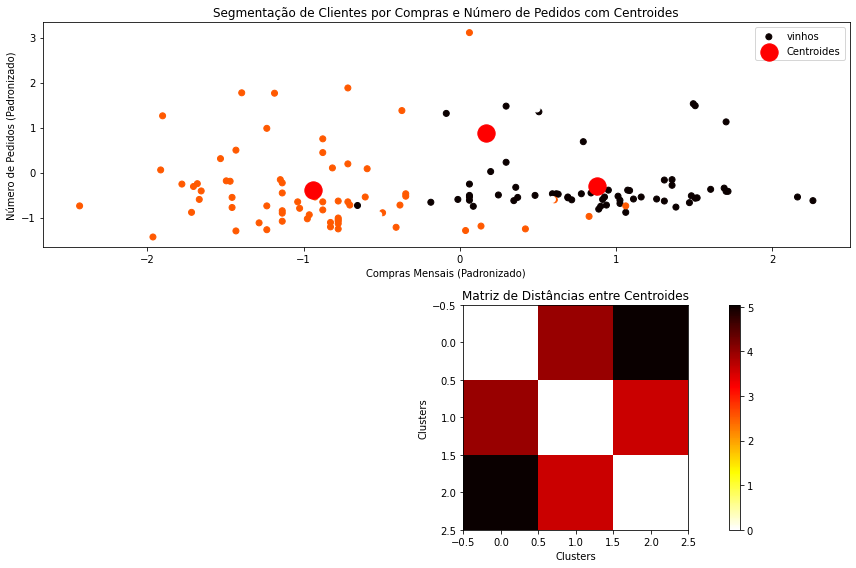

In [26]:
plt.figure(figsize=(12, 8))

# Gráfico de dispersão com cores de cluster
plt.subplot(2, 1, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels, cmap='hot_r', label='vinhos')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroides', marker='o')
plt.xlabel('Compras Mensais (Padronizado)')
plt.ylabel('Número de Pedidos (Padronizado)')
plt.title('Segmentação de Clientes por Compras e Número de Pedidos com Centroides')
plt.legend()

# Matriz de distâncias
plt.subplot(2, 1, 2)
plt.imshow(distances, cmap='hot_r', interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Distâncias entre Centroides')
plt.xlabel('Clusters')
plt.ylabel('Clusters')

plt.tight_layout()
plt.show()